In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

1. Libraries needed to perform Exploratory Analysis on Data:

In [2]:
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline     
sns.set(color_codes=True)

2. Load data into pandas Data Frame

In [11]:
df = pd.read_csv("Data/melb_data.csv")
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [12]:
# Check data types
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

4. Drop irrelevant columns

In [13]:
df = df.drop(['Method', 'Distance', 'Postcode', 'BuildingArea', 'Propertycount', 'Lattitude', 'Longtitude', 'CouncilArea'], axis=1)
df.head(5)

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.0,1.0,1.0,202.0,NaN,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.0,1.0,0.0,156.0,1900.0,Northern Metropolitan
2,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,3.0,2.0,0.0,134.0,1900.0,Northern Metropolitan
3,Abbotsford,40 Federation La,3,h,850000.0,Biggin,4/03/2017,3.0,2.0,1.0,94.0,NaN,Northern Metropolitan
4,Abbotsford,55a Park St,4,h,1600000.0,Nelson,4/06/2016,3.0,1.0,2.0,120.0,2014.0,Northern Metropolitan


5. Renaming the columns

In [14]:
df = df.rename(columns={'Bedroom2': 'Bedroom', 'Regionname': 'Region'})
df.head(5)

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Bedroom,Bathroom,Car,Landsize,YearBuilt,Region
0,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.0,1.0,1.0,202.0,NaN,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.0,1.0,0.0,156.0,1900.0,Northern Metropolitan
2,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,3.0,2.0,0.0,134.0,1900.0,Northern Metropolitan
3,Abbotsford,40 Federation La,3,h,850000.0,Biggin,4/03/2017,3.0,2.0,1.0,94.0,NaN,Northern Metropolitan
4,Abbotsford,55a Park St,4,h,1600000.0,Nelson,4/06/2016,3.0,1.0,2.0,120.0,2014.0,Northern Metropolitan


6. Drop duplicate rows

In [15]:
df.shape

(13580, 13)

In [17]:
dup_rows = df[df.duplicated()]
dup_rows.shape

(0, 13)

7. Drop missing or null values

In [18]:
df.isnull().sum()

Suburb          0
Address         0
Rooms           0
Type            0
Price           0
SellerG         0
Date            0
Bedroom         0
Bathroom        0
Car            62
Landsize        0
YearBuilt    5375
Region          0
dtype: int64

8. Detecting outliers

<AxesSubplot:xlabel='Price'>

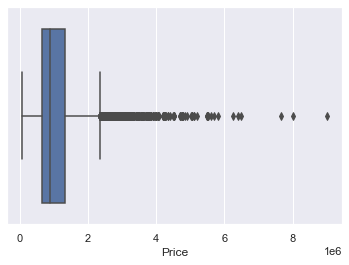

In [19]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Rooms'>

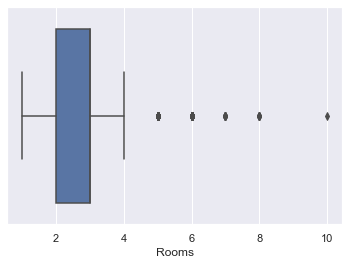

In [21]:
sns.boxplot(x=df['Rooms'])

<AxesSubplot:xlabel='Bedroom'>

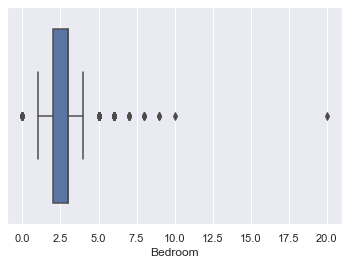

In [22]:
sns.boxplot(x=df['Bedroom'])

<AxesSubplot:xlabel='Bathroom'>

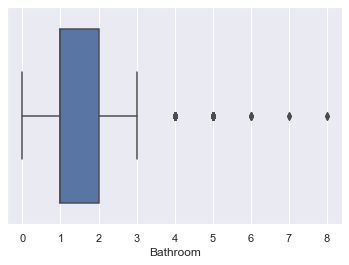

In [23]:
sns.boxplot(x=df['Bathroom'])

<AxesSubplot:xlabel='Car'>

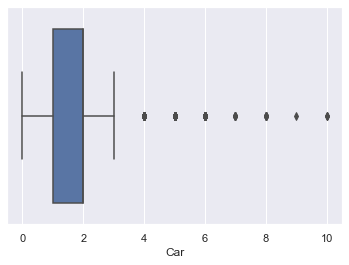

In [24]:
sns.boxplot(x=df['Car'])

<AxesSubplot:xlabel='Landsize'>

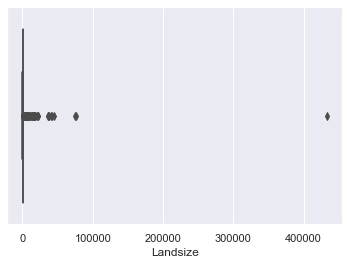

In [25]:
sns.boxplot(x=df['Landsize'])

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rooms             1.0
Price        680000.0
Bedroom           1.0
Bathroom          1.0
Car               1.0
Landsize        474.0
YearBuilt        59.0
dtype: float64


In [26]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(11581, 13)

<AxesSubplot:xlabel='Bathroom'>

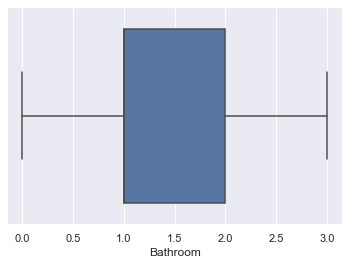

In [31]:
sns.boxplot(x=df['Bathroom'])

## Histogram
Histogram refers to the frequency of occurrence of variables in an interval. 

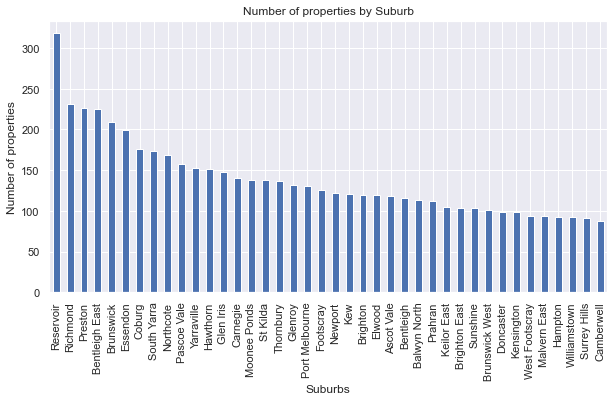

In [45]:
df.Suburb.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of properties by Suburb")
plt.ylabel("Number of properties")
plt.xlabel("Suburbs");

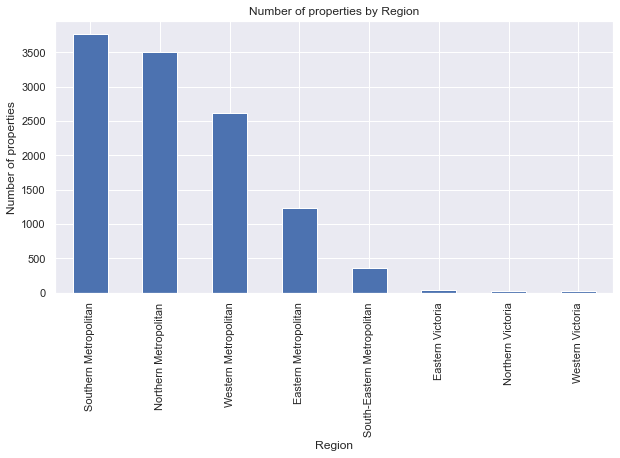

In [46]:
df.Region.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of properties by Region")
plt.ylabel("Number of properties")
plt.xlabel("Region");

## Heat Maps
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. 

,Rooms,Price,Bedroom,Bathroom,Car,Landsize,YearBuilt
Rooms,1.000000,0.467728,0.958877,0.506193,0.400617,0.475876,-0.041854
Price,0.467728,1.000000,0.452793,0.345962,0.191919,0.283605,-0.393316
Bedroom,0.958877,0.452793,1.000000,0.500526,0.400940,0.469974,-0.029177
Bathroom,0.506193,0.345962,0.500526,1.000000,0.308889,0.132090,0.227286
Car,0.400617,0.191919,0.400940,0.308889,1.000000,0.350198,0.200135
Landsize,0.475876,0.283605,0.469974,0.132090,0.350198,1.000000,-0.097945
YearBuilt,-0.041854,-0.393316,-0.029177,0.227286,0.200135,-0.097945,1.000000


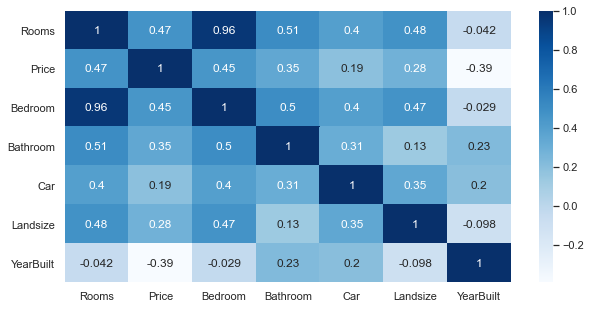

In [50]:
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
corr

## Scatterplot
We generally use scatter plots to find the correlation between two variables

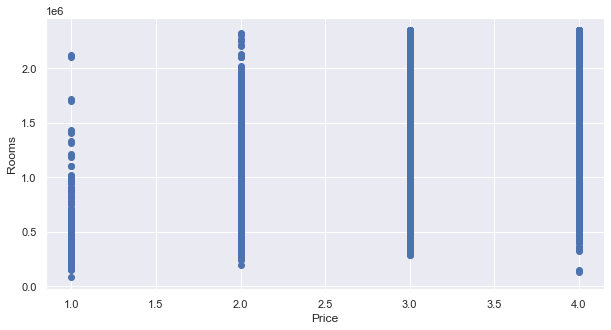

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Rooms'], df['Price'])
ax.set_xlabel('Price')
ax.set_ylabel('Rooms')
plt.show()

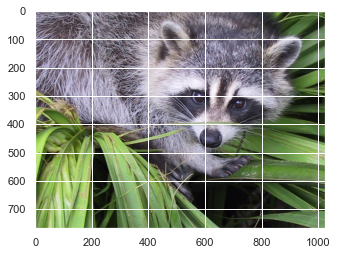

In [59]:
from scipy import misc
import matplotlib.pyplot as plt

face = misc.face()
plt.imshow(face)
plt.show()